In [1]:
import data.grid_configuration as grid_configuration_module
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import transporters.ptc_twiss.configuration as twiss_configuration_gen
import visualization.visualize as visualize
from data.units import unit_map, multiplier_for_unit
import visualization.optics_parameter_visualisation as opv
import sys
import os
from data.parameters_names import ParametersNames as Parameters
import transporters.transporters_factory as transporters_factory
sns.set_style("whitegrid")

In [2]:
path_to_project = "/home/rafalmucha/Pobrane/optic"

optic_folder_name = "2017_matched"

xml_file_name = "configuration_reco_beam1.xml"

In [3]:
s = 219.55
item_number = 2
path_to_xml_file = os.path.join(path_to_project, optic_folder_name, xml_file_name)
twiss_configuration = twiss_configuration_gen.TwissConfiguration.get_configuration_from_file(path_to_xml_file, item_number)
twiss_transporter = transporters_factory.get_transporter(twiss_configuration)

In [4]:
x_mean = 0.1e-3
delta_x = 0
theta_x_mean = 150e-6
delta_theta_x = 10e-6
y_mean = 0
delta_y = 0
theta_y_mean = 0
delta_theta_y = 0
pt_mean = 0
delta_pt = 0

x_resolution = 1
theta_x_resolution = 11
y_resolution = 1
theta_y_resolution = 1
pt_resolution = 1

grid_configuration = grid_configuration_module.CanonicalCoordinatesGridConfiguration.from_sigma(x_mean, delta_x, x_resolution,
                                                       theta_x_mean, delta_theta_x, theta_x_resolution,
                                                       y_mean, delta_y, y_resolution,
                                                       theta_y_mean, delta_theta_y, theta_y_resolution,
                                                        pt_mean, delta_pt, pt_resolution)
grid_120_name = r"$\theta_x = 120\mu$rad "
particles = grid_configuration.generate_grid()

(0, 219.5500000000001)

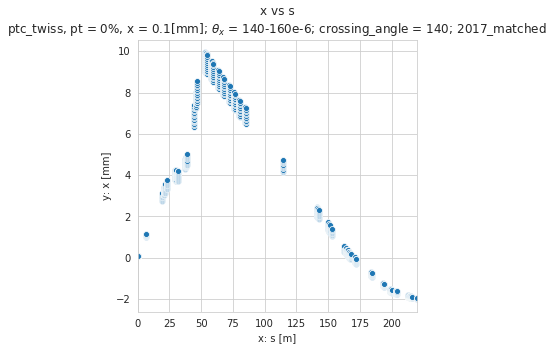

In [5]:
segments = twiss_transporter(particles)

f, axes = plt.subplots(1, 1)

pt = 0

matrix = segments["end"]

fig = plt.gcf()
fig.set_size_inches(5, 5)

title_sufix = r'ptc_twiss, pt = 0%, x = 0.1[mm]; $\theta_x$ = 140-160e-6; crossing_angle = 140; 2017_matched'

axes = visualize.plot_from_one_matrix(Parameters.S, Parameters.X, matrix, title_sufix=title_sufix, plot_function=sns.scatterplot)
axes.set_xlim(0,)

/home/rafalmucha/Pobrane/optic/optics_generator_python/src/visualization/visualize.py:38: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.00028760557760443284, right=0.00028760557760443284
  axes.set_xlim(np.min(vector_x), np.max(vector_x))


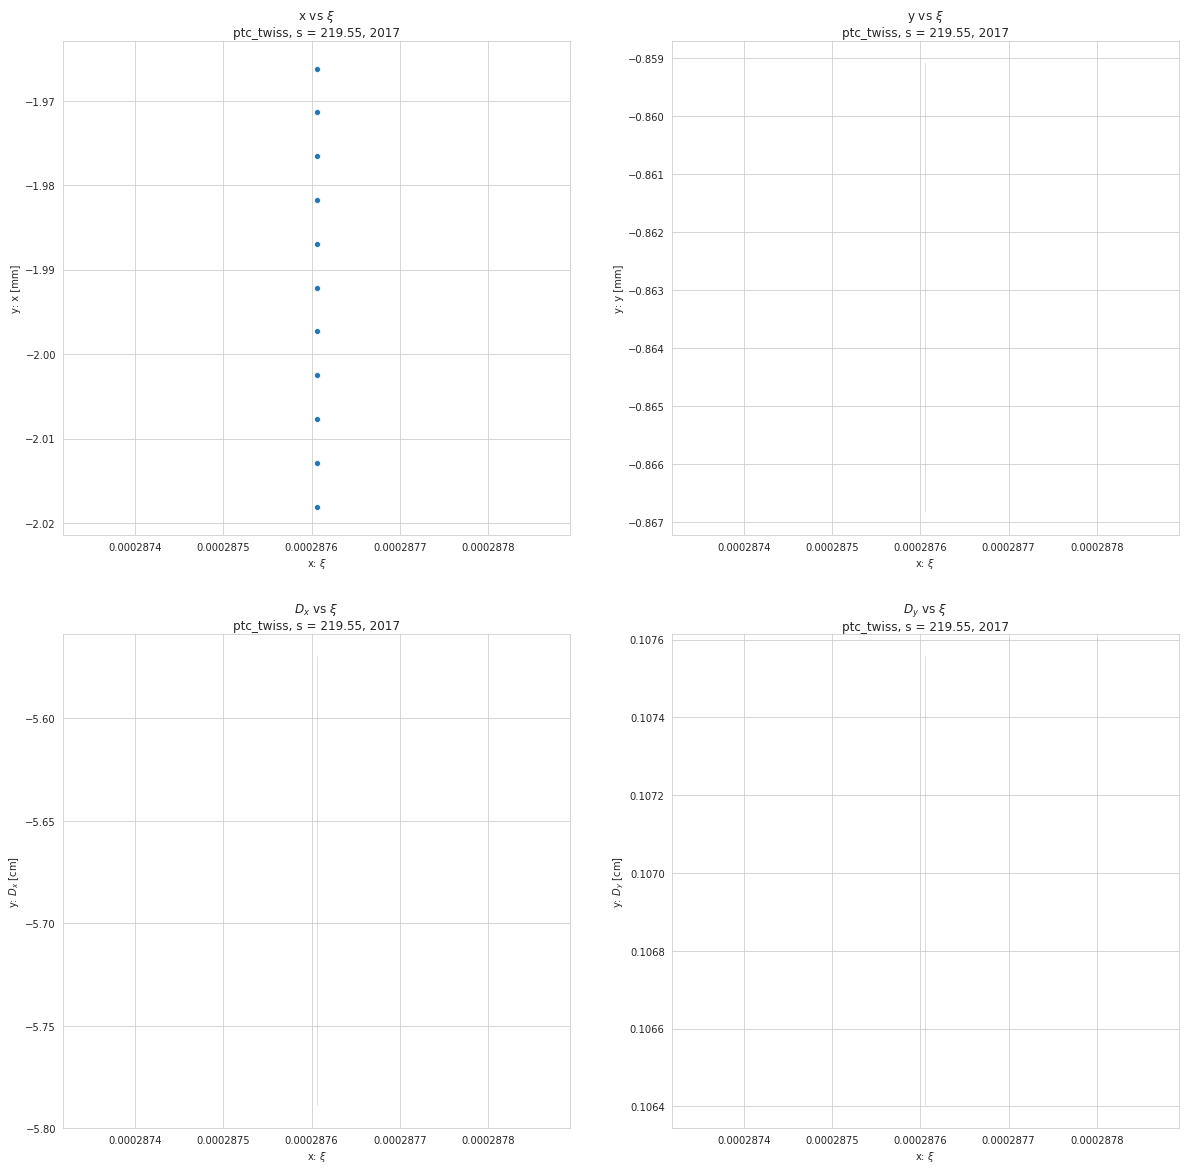

In [6]:
s = 219.55

filtered_matrix = matrix.filter_equals(Parameters.S, s)

f, axes = plt.subplots(2, 2)

fig = plt.gcf()
fig.set_size_inches(20,20)

title_sufix = "ptc_twiss, s = 219.55, 2017"

visualize.plot_from_two_matrices(Parameters.PT, Parameters.X, filtered_matrix, filtered_matrix, title_sufix, plot_function=sns.scatterplot, ax=axes[0][0])

visualize.plot_from_two_matrices(Parameters.PT, Parameters.Y, filtered_matrix, filtered_matrix, title_sufix, ax=axes[0][1])

visualize.plot_from_two_matrices(Parameters.PT, Parameters.D_X, filtered_matrix, filtered_matrix, title_sufix, ax=axes[1][0])

visualize.plot_from_two_matrices(Parameters.PT, Parameters.D_Y, filtered_matrix, filtered_matrix, title_sufix, ax=axes[1][1])